## Preprocess

In [1]:
import pandas as pd
import numpy as np
import importlib as imp
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sys

sys.path.insert(0,'..\src')

In [3]:
try:
    imp.reload(sys.modules['preprocess'])
except KeyError:
    pass

from preprocess import BasePreprocess

In [4]:
try:
    imp.reload(sys.modules['Scoring'])
except KeyError:
    pass

from Scoring import Scoring
s = Scoring()

In [5]:
data1 = BasePreprocess(pd.read_csv('../data/cars.csv')).run(ohIncludeBool = True, toDrop = ['manufacturer_name', 'model_name', 'number_of_photos', 'color', 'up_counter'])
data2 = BasePreprocess(pd.read_csv('../data/lab2/diabetes_012_health_indicators_BRFSS2015.csv')).run()

Found gaps in 1 columns
Found 7 categorial signs (meaning object types)
Found 41 categorial signs (meaning bool types)
Found gaps in 0 columns
Found 0 categorial signs (meaning object types)


In [6]:
data1

,odometer_value,year_produced,engine_capacity,price_usd,duration_listed,engine_has_gas_True,has_warranty_True,is_exchangeable_True,feature_0_True,feature_1_True,...,body_type_van_True,state_new_True,state_owned_True,drivetrain_front_True,drivetrain_rear_True,location_region_Витебская обл._True,location_region_Гомельская обл._True,location_region_Гродненская обл._True,location_region_Минская обл._True,location_region_Могилевская обл._True
0,190000,2010,2.5,10900.00,16,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,290000,2002,3.0,5000.00,83,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
2,402000,2001,2.5,2800.00,151,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,10000,1999,3.0,9999.00,86,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,280000,2001,2.5,2134.11,7,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,2750.00,301,False,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
38527,321000,2004,2.2,4800.00,317,False,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False
38528,777957,2000,3.5,4300.00,369,False,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
38529,20000,2001,2.0,4000.00,490,False,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False


In [7]:
data2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
y1 = data1['price_usd']
X1 = data1.drop(['price_usd'], axis=1)

In [8]:
y1

0        10900.00
1         5000.00
2         2800.00
3         9999.00
4         2134.11
           ...   
38526     2750.00
38527     4800.00
38528     4300.00
38529     4000.00
38530     3200.00
Name: price_usd, Length: 38531, dtype: float64

In [9]:
X1

,odometer_value,year_produced,engine_capacity,duration_listed,transmission_mechanical,engine_fuel_electric,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,...,feature_0_True,feature_1_True,feature_2_True,feature_3_True,feature_4_True,feature_5_True,feature_6_True,feature_7_True,feature_8_True,feature_9_True
0,190000,2010,2.5,16,0,0,0,1,0,0,...,0,1,1,1,0,1,0,1,1,1
1,290000,2002,3.0,83,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
2,402000,2001,2.5,151,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,10000,1999,3.0,86,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,280000,2001,2.5,7,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,301,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,1
38527,321000,2004,2.2,317,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,1
38528,777957,2000,3.5,369,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,1
38529,20000,2001,2.0,490,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=38)

In [10]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((30824, 45), (7707, 45), (30824,), (7707,))

In [12]:
y2 = data2['Diabetes_012']
X2 = data2.drop(['Diabetes_012'], axis=1)

In [13]:
y2

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

In [14]:
X2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=38)

In [16]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((169965, 21), (83715, 21), (169965,), (83715,))

In [17]:
from preprocess import Sampling

X_train_ros, y_train_ros = Sampling.sample(X = X2_train, y = y2_train, usingMethod = 'RandomlyOverSample')
X_train_rus, y_train_rus = Sampling.sample(X = X2_train, y = y2_train, usingMethod = 'RandomlyUnderSample')

[(0.0, 143231), (1.0, 143231), (2.0, 143231)]
[(0.0, 3096), (1.0, 3096), (2.0, 3096)]


## Задание 1

### Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.

### Классификация

#### OverSampling

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=3)

In [18]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- class: 0.0
|   |   |--- feature_18 >  8.50
|   |   |   |--- class: 0.0
|   |--- feature_13 >  2.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1.0
|--- feature_0 >  0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_3 <= 29.50
|   |   |   |--- class: 0.0
|   |   |--- feature_3 >  29.50
|   |   |   |--- class: 1.0
|   |--- feature_13 >  2.50
|   |   |--- feature_3 <= 31.50
|   |   |   |--- class: 2.0
|   |   |--- feature_3 >  31.50
|   |   |   |--- class: 2.0



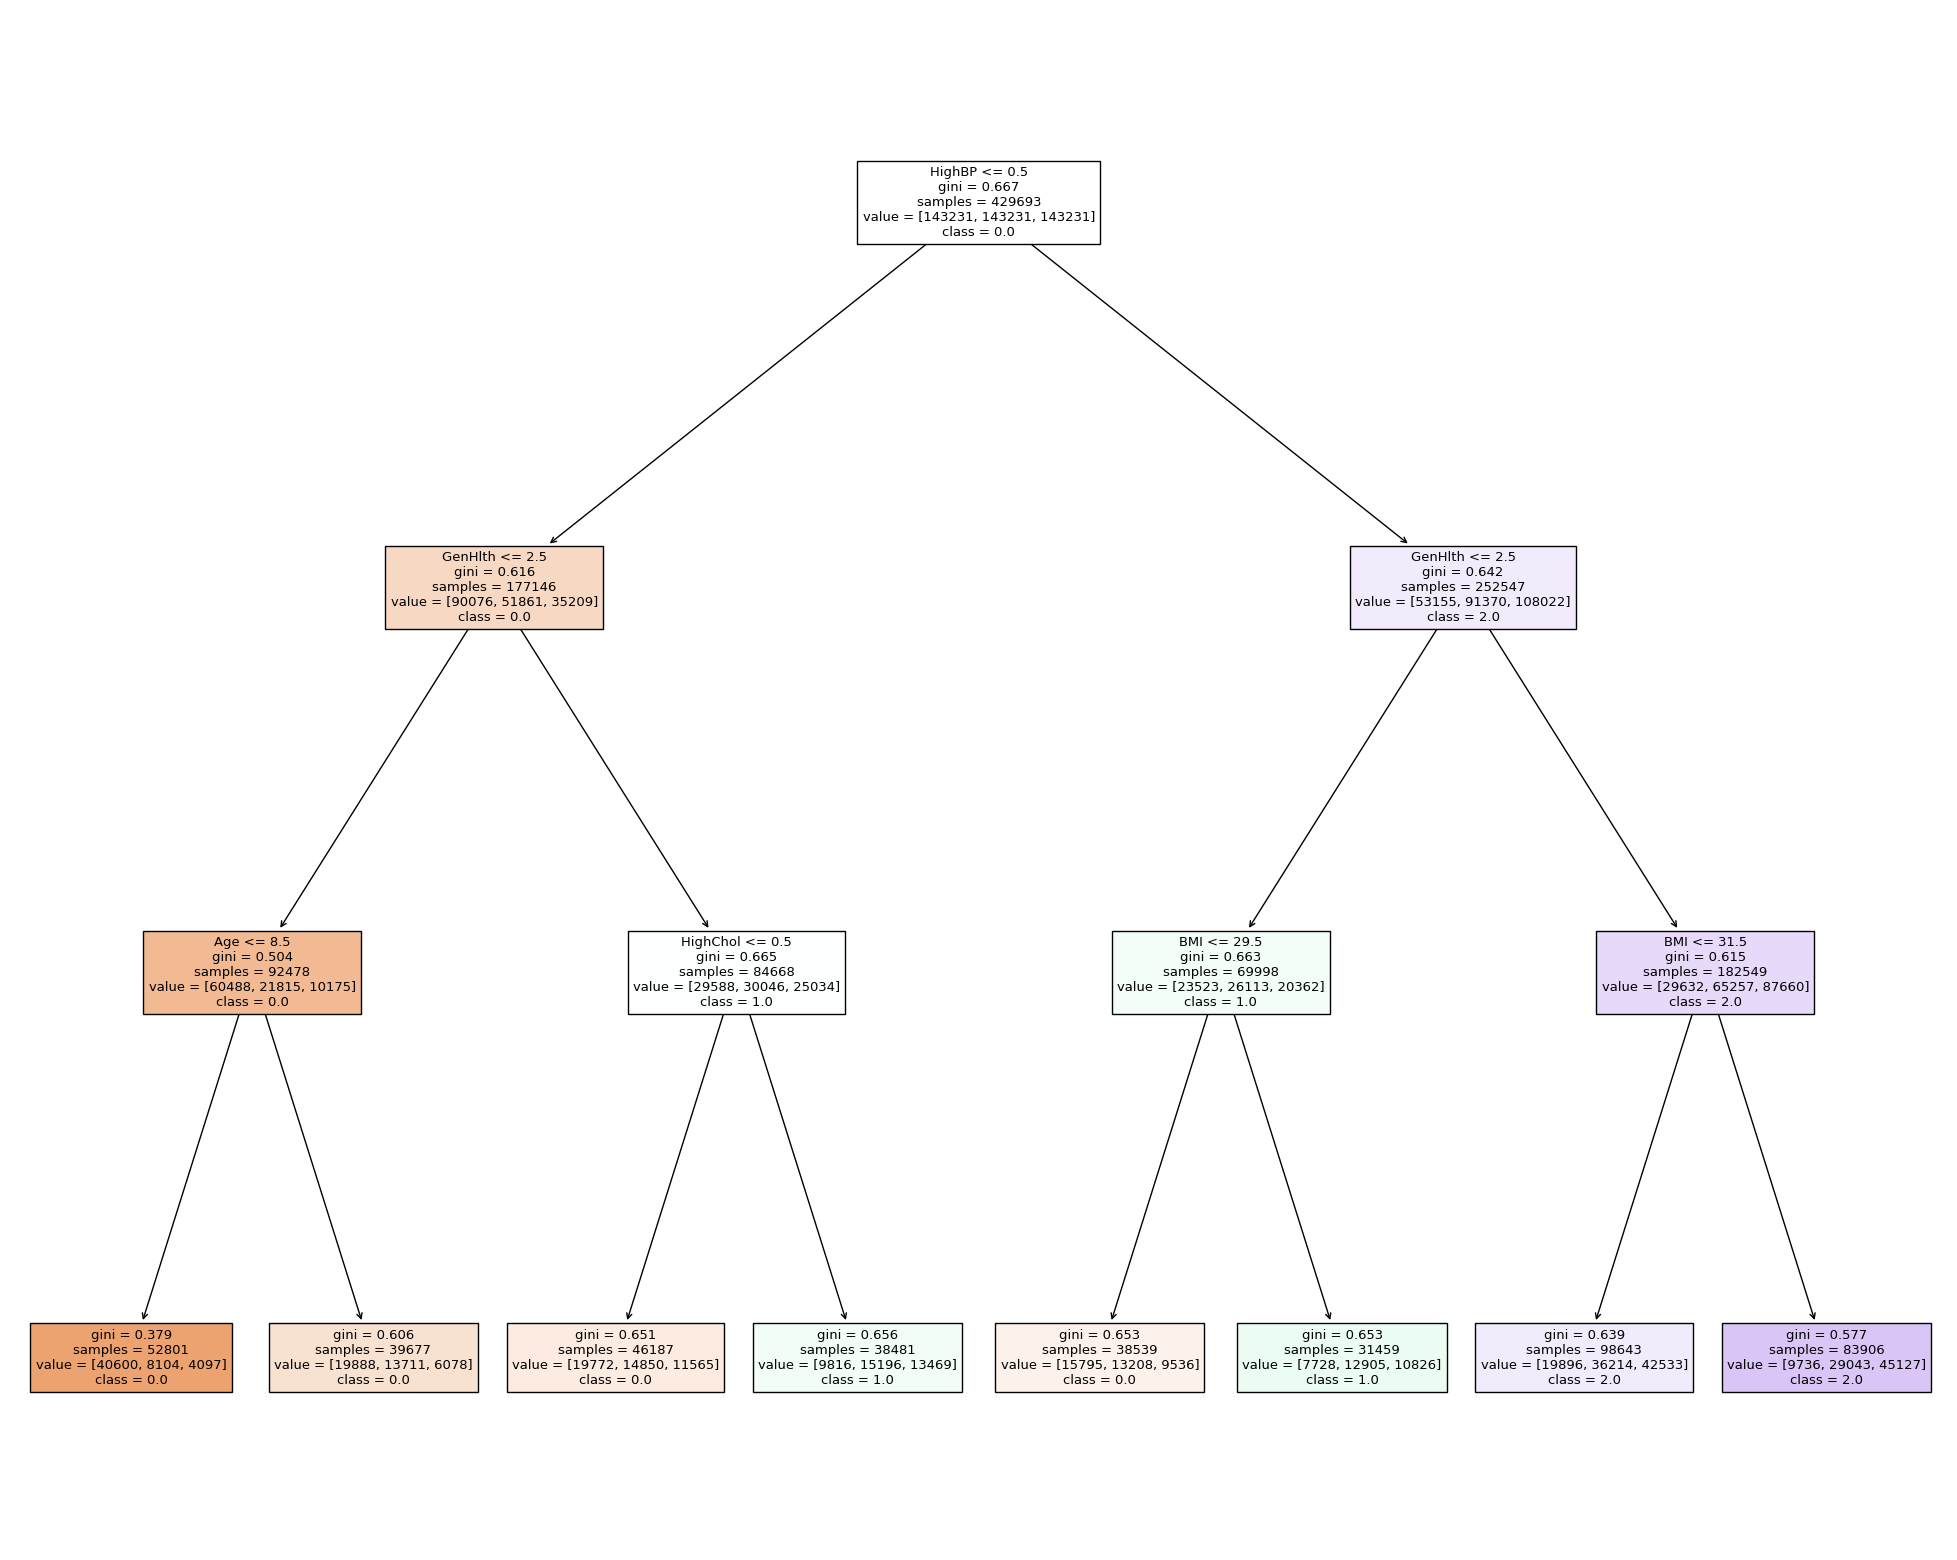

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=list(X2.columns), class_names=list(map(str, list(np.unique(y2)))), filled=True)

In [40]:
clf.predict(X2_test)

array([0., 0., 1., ..., 0., 0., 0.])

In [41]:
s.Confusion_matrix(y2_test, clf.predict(X2_test))

array([[47169,  8783, 14520],
       [  532,   314,   689],
       [ 2613,  1941,  7154]])

In [42]:
s.report(y2_test, clf.predict(X2_test))

Accuracy	0.6526548408290032
Precision	{0.0: 0.937492546806058, 1.0: 0.028447182460590685, 2.0: 0.3199034118857041}
Recall		{0.0: 0.6693296628448178, 1.0: 0.2045602605863192, 2.0: 0.6110351896139392}
F1		{0.0: 0.39051711291043667, 1.0: 0.024974150958402924, 2.0: 0.20997329106865076}



In [47]:
parameters = {'max_depth': np.arange(1, 10, 1)}

In [48]:
dtc_opt = GridSearchCV(DecisionTreeClassifier(), parameters).fit(X_train_ros, y_train_ros)

In [49]:
dtc_opt.best_params_

{'max_depth': 9}

In [50]:
better_clf = DecisionTreeClassifier(max_depth=9)
better_clf.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=9)

In [51]:
print(tree.export_text(better_clf))

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- feature_3 <= 30.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_13 <= 1.50
|   |   |   |   |   |   |--- feature_20 <= 7.50
|   |   |   |   |   |   |   |--- feature_18 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 21.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_3 >  21.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_18 >  3.50
|   |   |   |   |   |   |   |   |--- feature_14 <= 9.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_14 >  9.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_20 >  7.50
|   |   |   |   |   |   |   |--- feature_15 <= 4.50
|   |   |   |   |   |   |   |   |--- feature_14 <= 4.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   | 

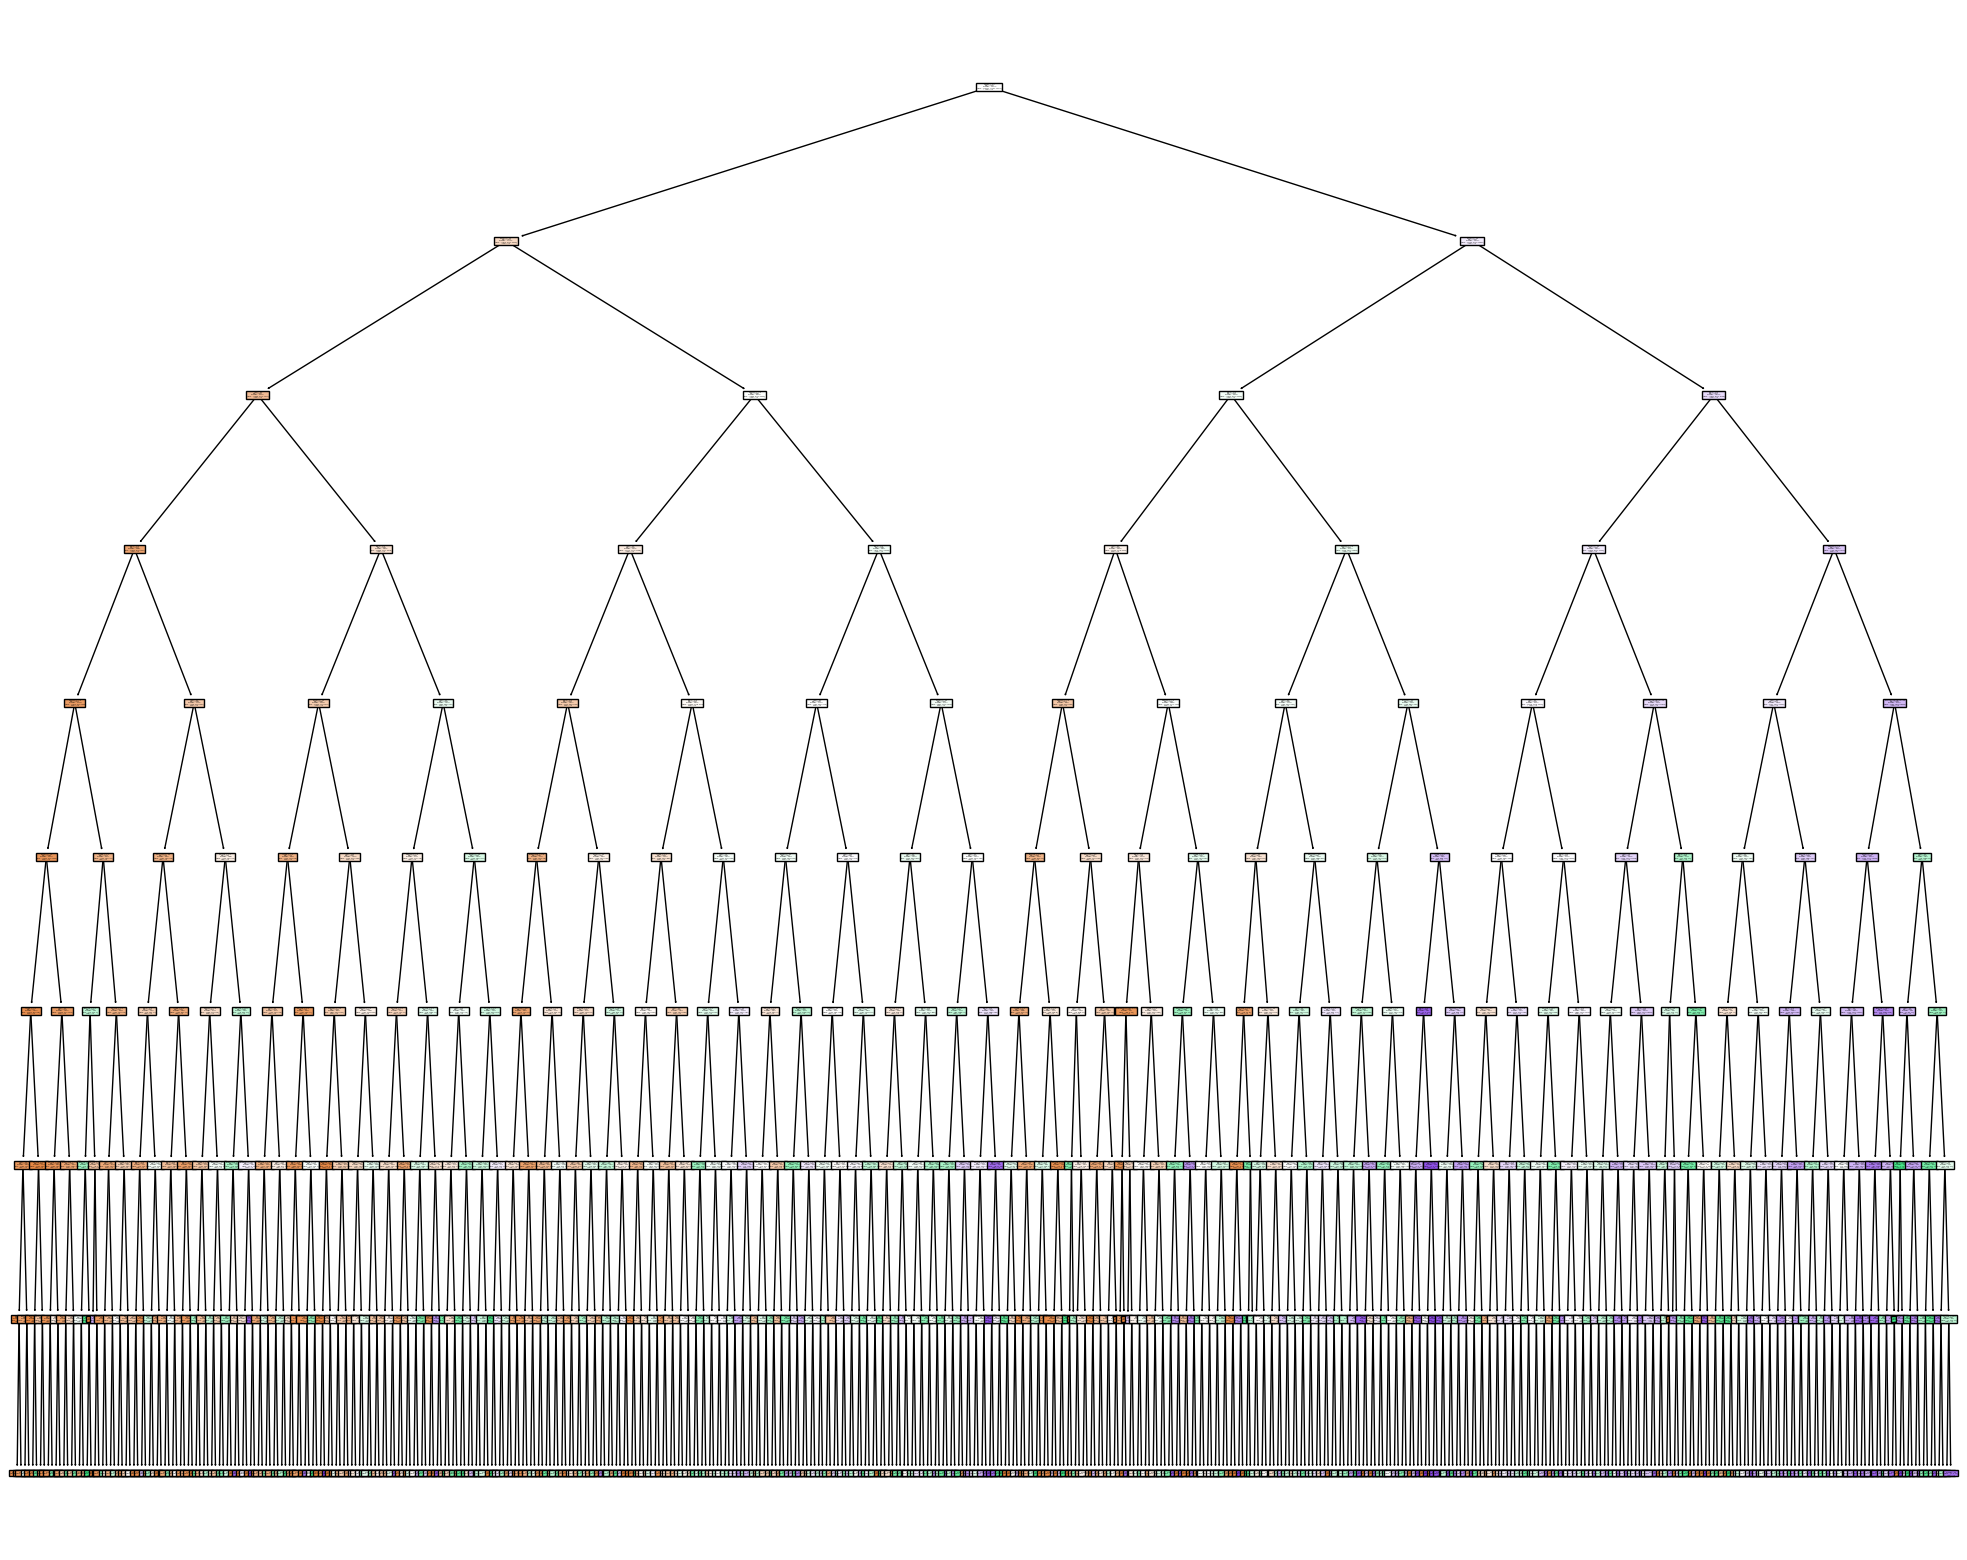

In [52]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(better_clf, feature_names=list(X2.columns), class_names=list(map(str, list(np.unique(y2)))), filled=True)

In [53]:
s.Confusion_matrix(y2_test, better_clf.predict(X2_test))

array([[41495, 17402, 11575],
       [  391,   541,   603],
       [ 1806,  3811,  6091]])

In [54]:
s.report(y2_test, better_clf.predict(X2_test))

Accuracy	0.5748909992235561
Precision	{0.0: 0.9497161951844731, 1.0: 0.024868989611106004, 2.0: 0.333406316711369}
Recall		{0.0: 0.5888154160517652, 1.0: 0.352442996742671, 2.0: 0.5202425691834643}
F1		{0.0: 0.36346834378613224, 1.0: 0.02322985100261926, 2.0: 0.20318911165226675}



#### UnderSampling

In [55]:
clfu = DecisionTreeClassifier(max_depth=3)
clfu.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=3)

In [56]:
print(tree.export_text(clfu))

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- class: 0.0
|   |   |--- feature_18 >  8.50
|   |   |   |--- class: 0.0
|   |--- feature_13 >  2.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1.0
|--- feature_0 >  0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1.0
|   |--- feature_13 >  2.50
|   |   |--- feature_13 <= 3.50
|   |   |   |--- class: 2.0
|   |   |--- feature_13 >  3.50
|   |   |   |--- class: 2.0



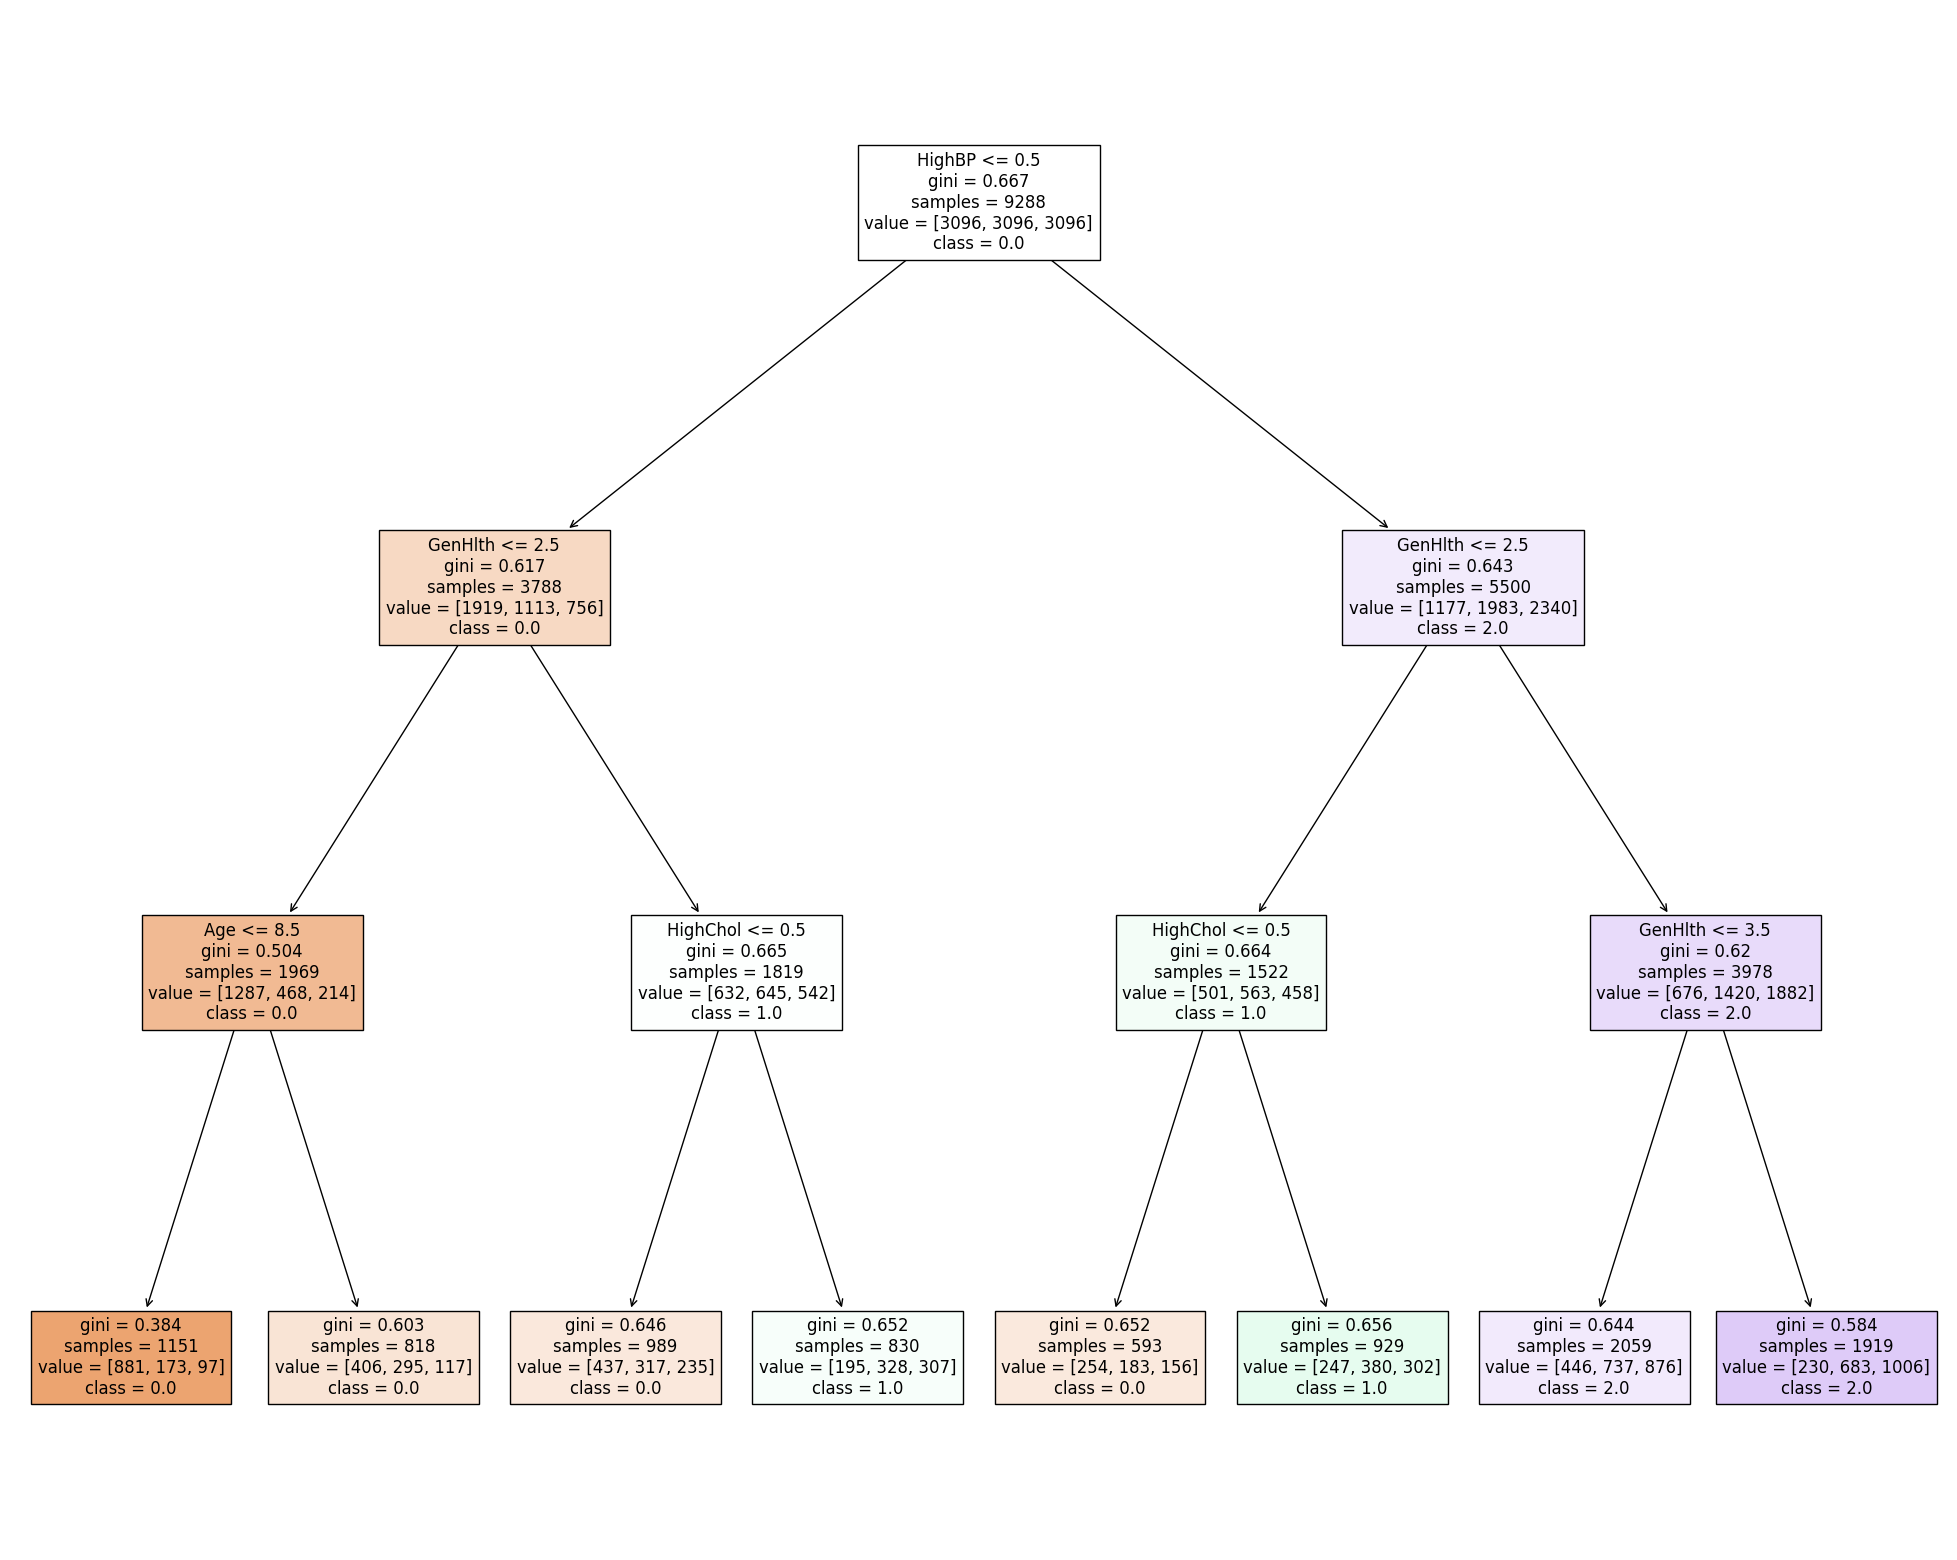

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clfu, feature_names=list(X2.columns), class_names=list(map(str, list(np.unique(y2)))), filled=True)

In [59]:
clfu.predict(X2_test)

array([0., 0., 1., ..., 0., 0., 0.])

In [60]:
s.Confusion_matrix(y2_test, clf.predict(X2_test))


array([[47169,  8783, 14520],
       [  532,   314,   689],
       [ 2613,  1941,  7154]])

In [61]:
s.report(y2_test, clf.predict(X2_test))

Accuracy	0.6526548408290032
Precision	{0.0: 0.937492546806058, 1.0: 0.028447182460590685, 2.0: 0.3199034118857041}
Recall		{0.0: 0.6693296628448178, 1.0: 0.2045602605863192, 2.0: 0.6110351896139392}
F1		{0.0: 0.39051711291043667, 1.0: 0.024974150958402924, 2.0: 0.20997329106865076}



In [62]:
dtcu_opt = GridSearchCV(DecisionTreeClassifier(), parameters).fit(X_train_ros, y_train_ros)
dtcu_opt.best_params_

{'max_depth': 9}

In [63]:
better_clfu = DecisionTreeClassifier(max_depth=9)
better_clfu.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=9)

In [64]:
print(tree.export_text(better_clfu))

|--- feature_0 <= 0.50
|   |--- feature_13 <= 2.50
|   |   |--- feature_18 <= 8.50
|   |   |   |--- feature_3 <= 30.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- feature_14 <= 4.50
|   |   |   |   |   |   |   |--- feature_15 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- feature_15 >  3.50
|   |   |   |   |   |   |   |   |--- feature_20 <= 6.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_20 >  6.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_14 >  4.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |  

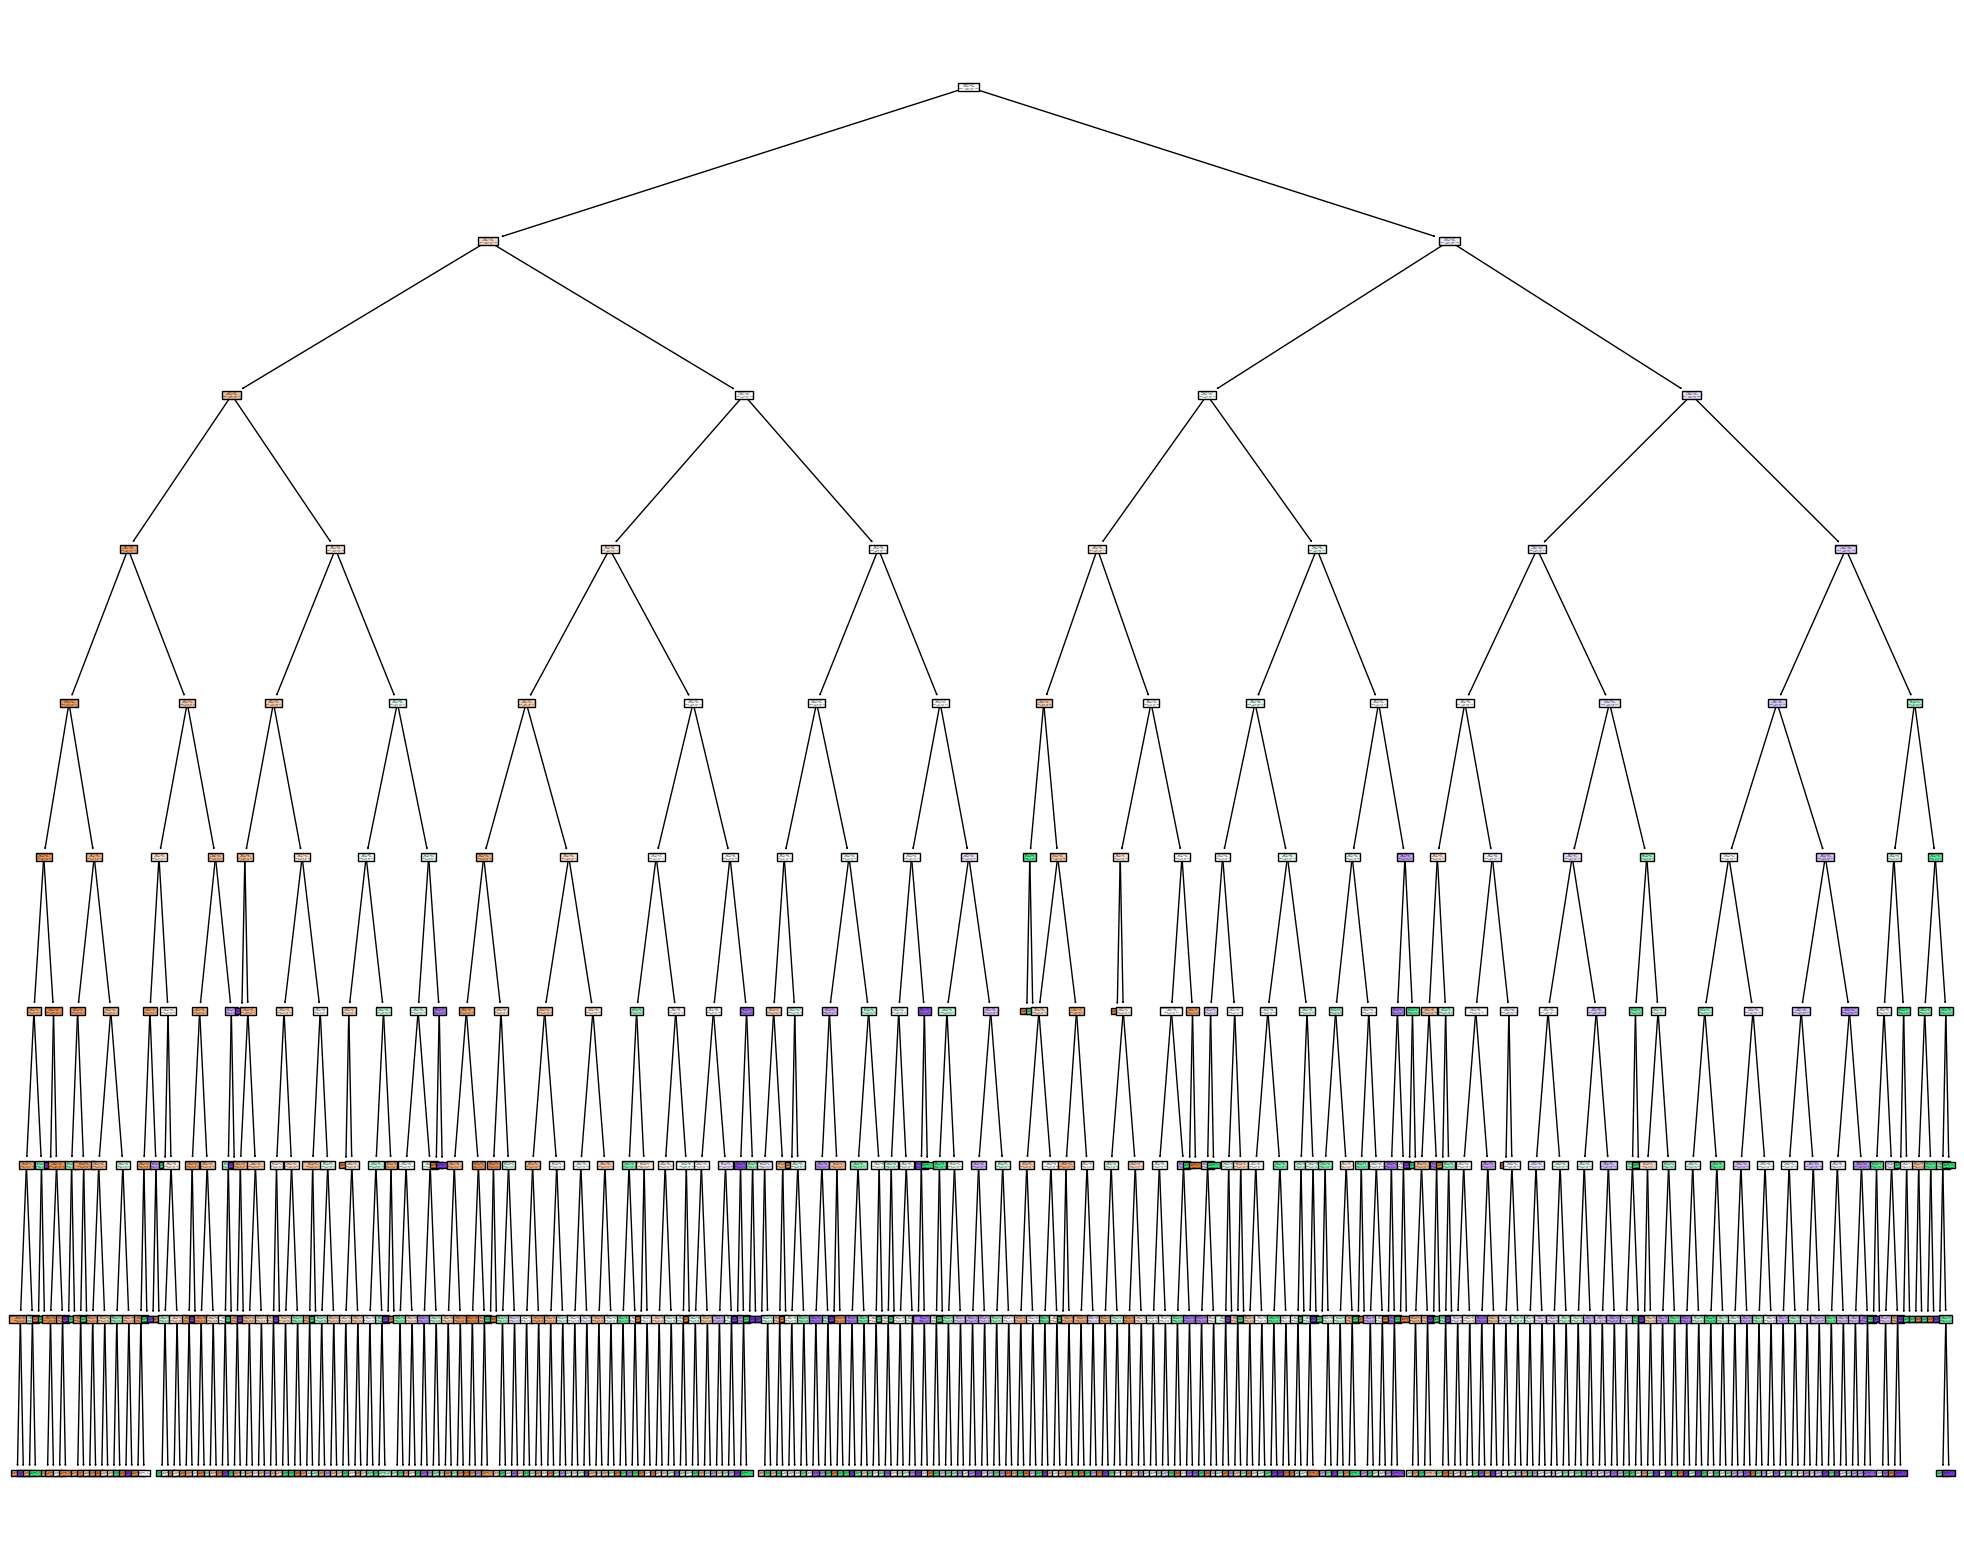

In [65]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(better_clfu, feature_names=list(X2.columns), class_names=list(map(str, list(np.unique(y2)))), filled=True)

In [66]:
s.Confusion_matrix(y2_test, better_clfu.predict(X2_test))

array([[39444, 17273, 13755],
       [  375,   508,   652],
       [ 1722,  3244,  6742]])

In [67]:
s.report(y2_test, better_clfu.predict(X2_test))

Accuracy	0.5577733978379024
Precision	{0.0: 0.9495197515707373, 1.0: 0.024161712247324614, 2.0: 0.3187857581918767}
Recall		{0.0: 0.5597116585310478, 1.0: 0.3309446254071661, 2.0: 0.5758455756747523}
F1		{0.0: 0.35213769830287556, 1.0: 0.022517730496453902, 2.0: 0.20519219648781084}



### Регрессия

In [22]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=3)

In [77]:
print(tree.export_text(reg))

|--- feature_1 <= 2006.50
|   |--- feature_1 <= 2000.50
|   |   |--- feature_2 <= 2.35
|   |   |   |--- value: [1852.71]
|   |   |--- feature_2 >  2.35
|   |   |   |--- value: [3653.16]
|   |--- feature_1 >  2000.50
|   |   |--- feature_25 <= 0.50
|   |   |   |--- value: [7554.75]
|   |   |--- feature_25 >  0.50
|   |   |   |--- value: [4673.09]
|--- feature_1 >  2006.50
|   |--- feature_25 <= 0.50
|   |   |--- feature_1 <= 2013.50
|   |   |   |--- value: [15044.58]
|   |   |--- feature_1 >  2013.50
|   |   |   |--- value: [26101.76]
|   |--- feature_25 >  0.50
|   |   |--- feature_1 <= 2012.50
|   |   |   |--- value: [7842.30]
|   |   |--- feature_1 >  2012.50
|   |   |   |--- value: [13235.18]



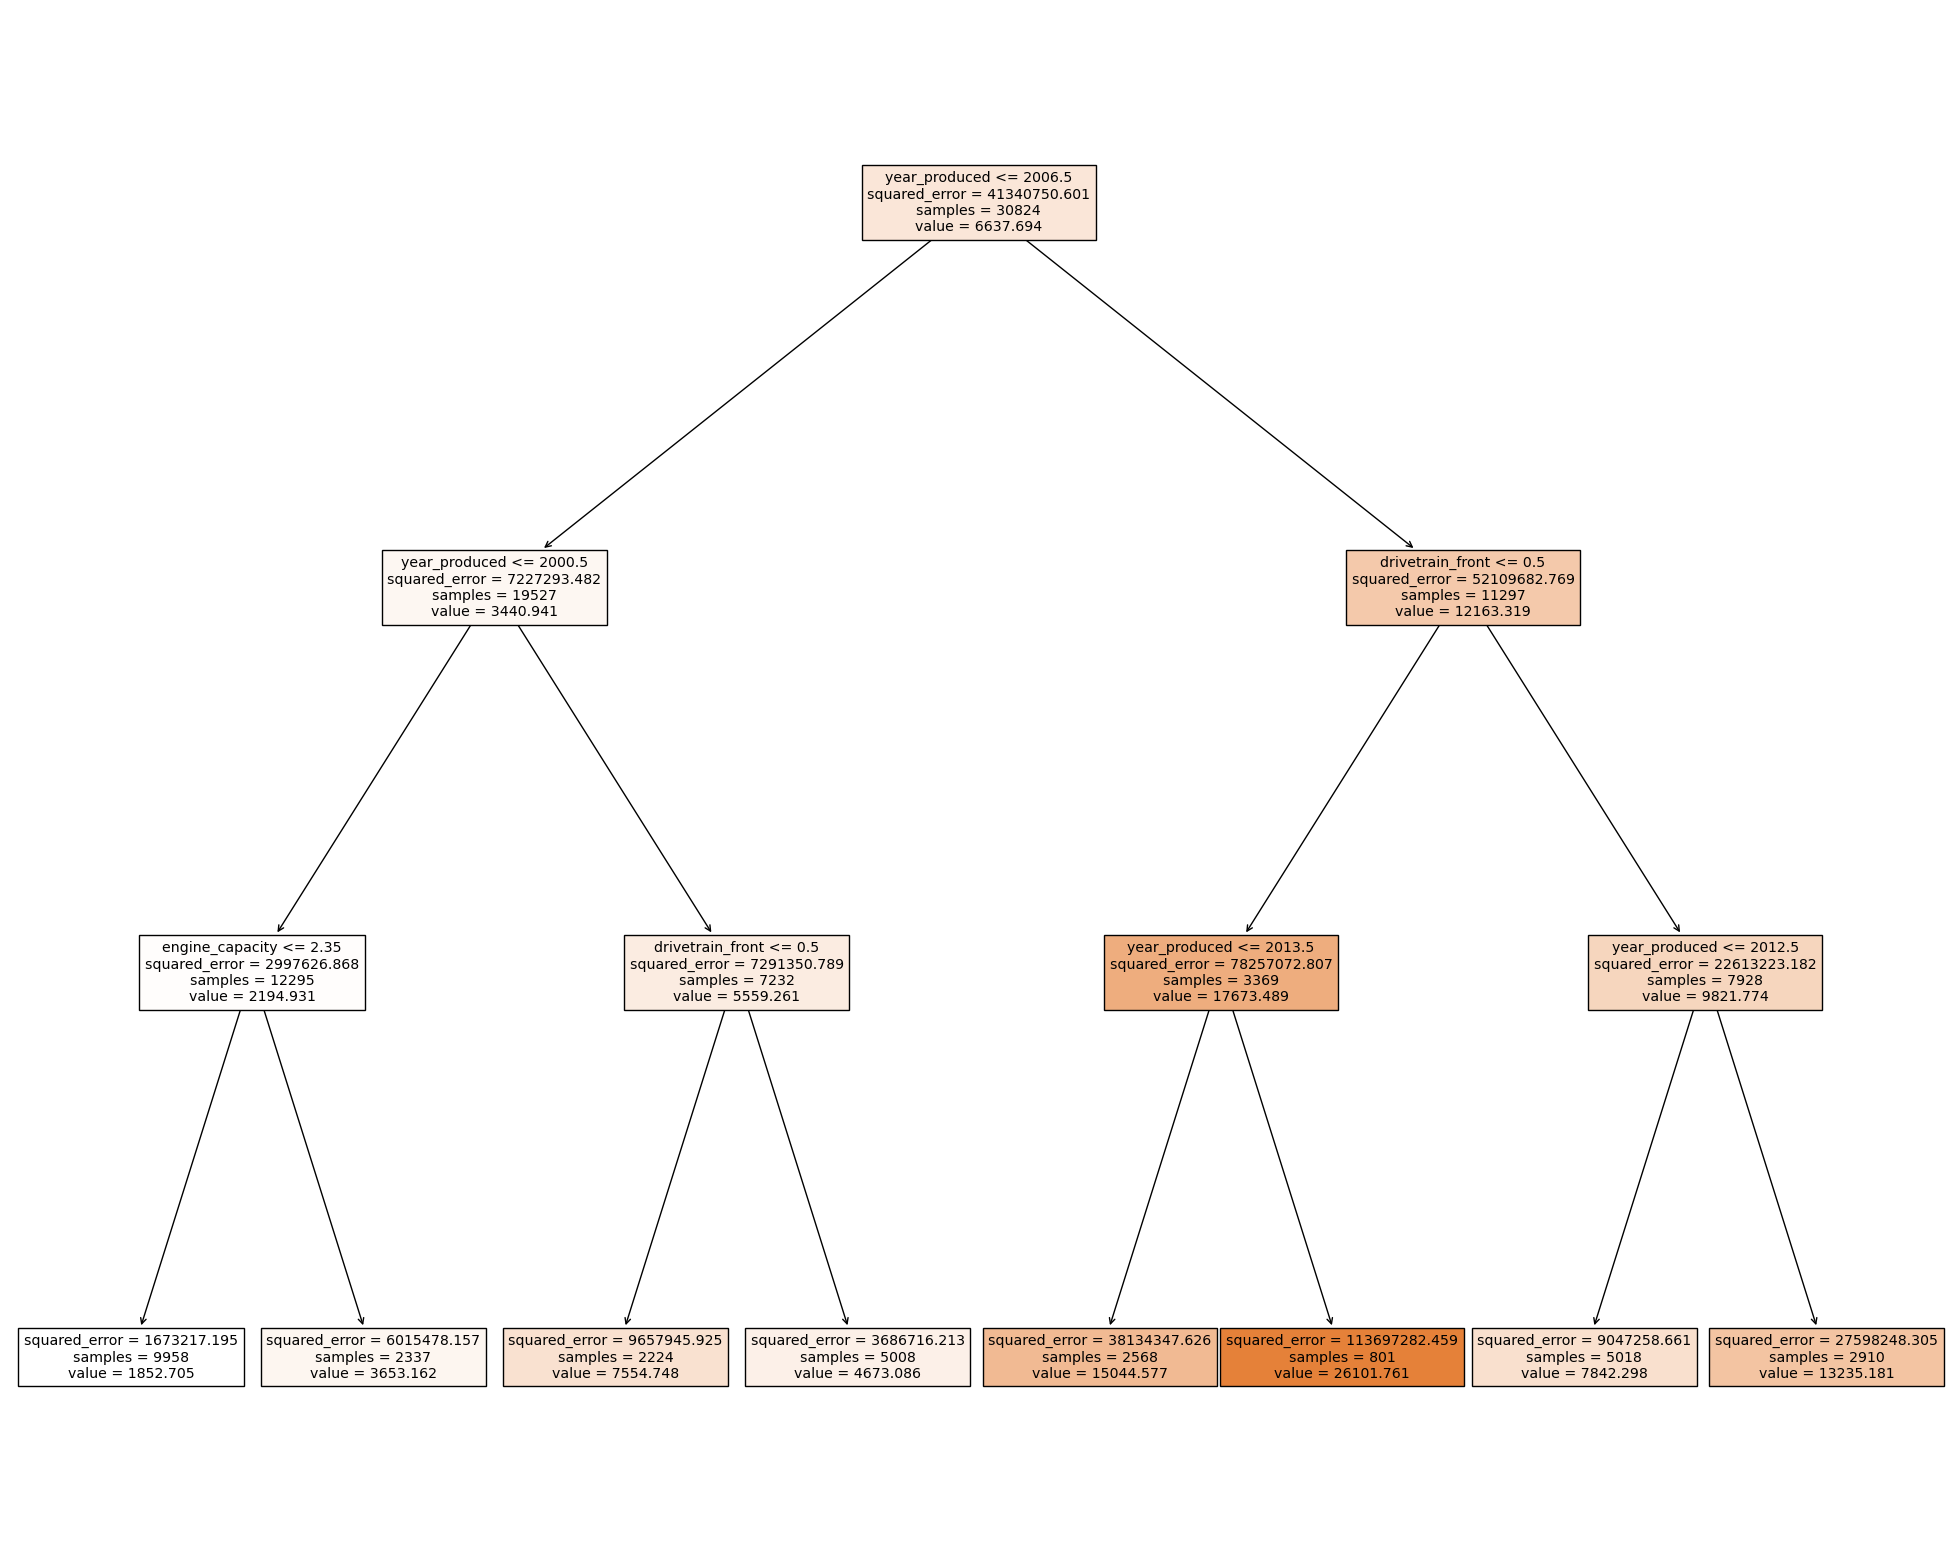

In [25]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=list(X1.columns), filled=True)

In [70]:
res = reg.predict(X1_test)

In [71]:
from math import sqrt

print(f'MAE: {s.MAE(y1_test, res)}')
print(f'MSE: {s.MSE(y1_test, res)}')
print(f'RMSE: {s.RMSE(y1_test, res)}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, res))}')
print(f'R^2: {s.score(y1_test, res)}')

MAE: 2202.704552856681
MSE: 12540659.086268565
RMSE: 3541.2793007991568
MAPE: 0.9963202903150962
R^2: 0.27791942710959394


In [75]:
reg_opt = GridSearchCV(DecisionTreeRegressor(), {'max_depth': np.arange(1, 20, 1)}).fit(X1_train, y1_train)
reg_opt.best_params_

{'max_depth': 9}

In [76]:
better_reg = DecisionTreeRegressor(max_depth=9)
better_reg.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=9)

In [79]:
print(tree.export_text(better_reg))

|--- feature_1 <= 2006.50
|   |--- feature_1 <= 2000.50
|   |   |--- feature_2 <= 2.35
|   |   |   |--- feature_1 <= 1997.50
|   |   |   |   |--- feature_2 <= 1.85
|   |   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 1995.50
|   |   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 225.00
|   |   |   |   |   |   |   |   |   |--- value: [6200.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  225.00
|   |   |   |   |   |   |   |   |   |--- value: [1633.99]
|   |   |   |   |   |   |   |--- feature_25 >  0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 1981.00
|   |   |   |   |   |   |   |   |   |--- value: [2623.50]
|   |   |   |   |   |   |   |   |--- feature_1 >  1981.00
|   |   |   |   |   |   |   |   |   |--- value: [1192.37]
|   |   |   |   |   |   |--- feature_1 >  1995.50
|   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   | 

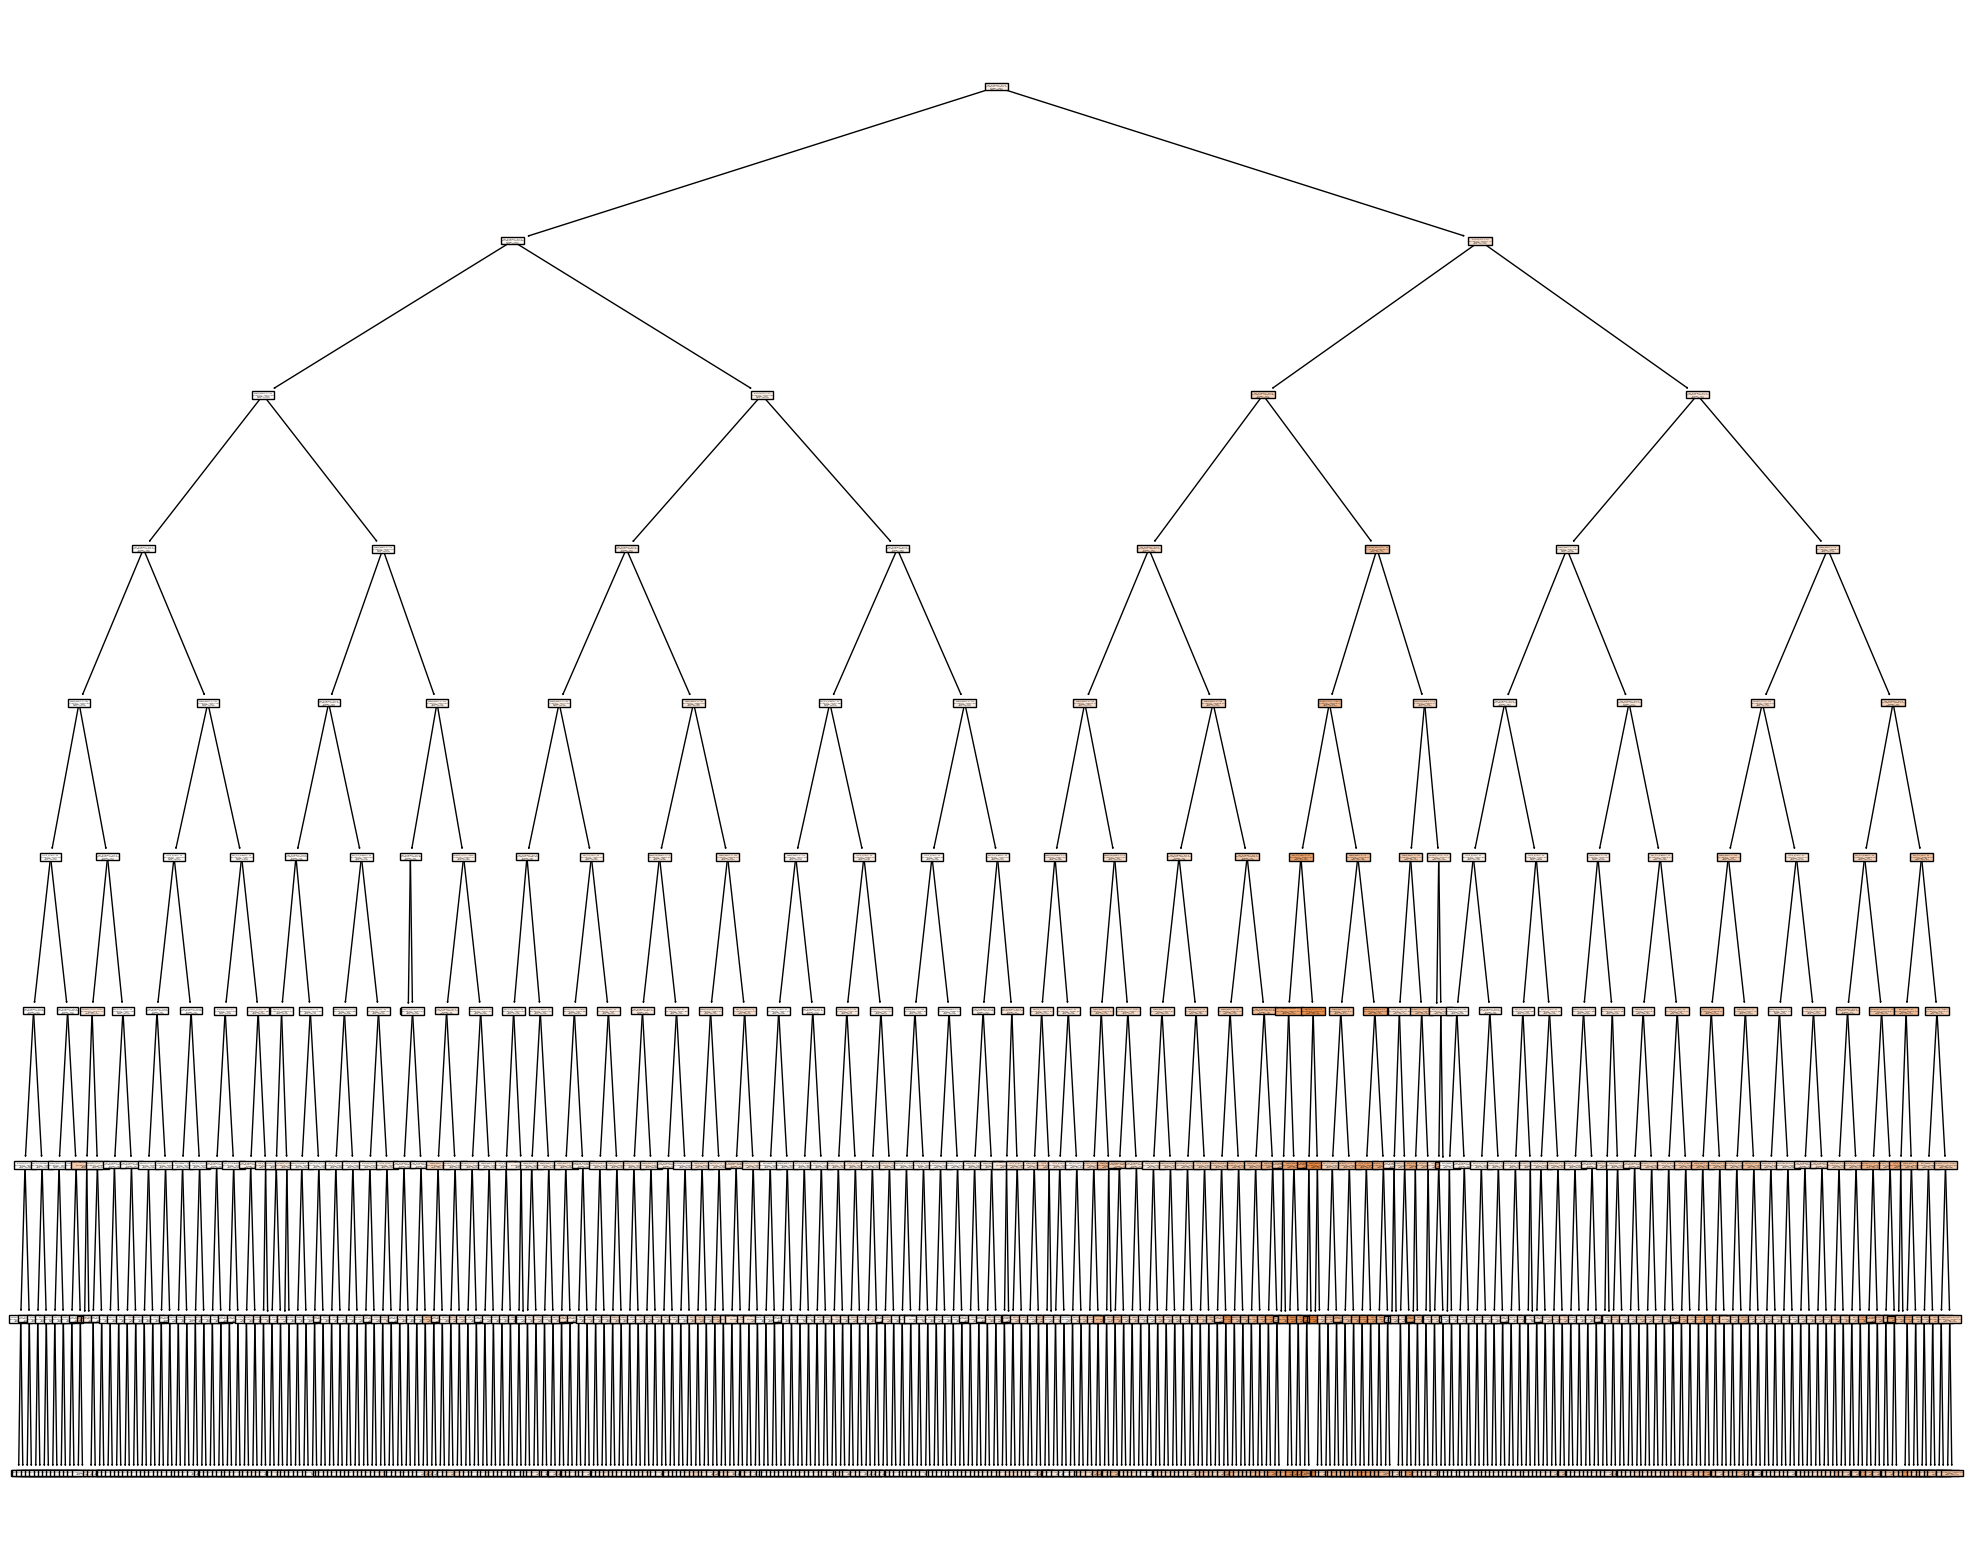

In [80]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(better_reg, feature_names=list(X1.columns), filled=True)

In [81]:
resb = better_reg.predict(X1_test)

In [82]:
from math import sqrt

print(f'MAE: {s.MAE(y1_test, resb)}')
print(f'MSE: {s.MSE(y1_test, resb)}')
print(f'RMSE: {s.RMSE(y1_test, resb)}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, resb))}')
print(f'R^2: {s.score(y1_test, resb)}')

MAE: 1482.4224860312554
MSE: 6515127.855797732
RMSE: 2552.4748491998375
MAPE: 0.8873139846225749
R^2: 0.08554732358036177


## Задание 2

Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
- BaggingClassifier
- BaggingRegressor
- GradientBoostingClassifier
- GradientBoostingRegressor
- StackingClassifier
- StackingRegressor

### BaggingClassifier

In [26]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bclf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=9), max_samples=10, random_state=42).fit(X_train_ros, y_train_ros)

In [88]:
bclf.predict(X2_test)

array([0., 0., 1., ..., 0., 0., 0.])

In [89]:
s.Confusion_matrix(y2_test, bclf.predict(X2_test))

array([[48917, 16891,  4664],
       [  753,   661,   121],
       [ 4590,  6226,   892]])

In [90]:
s.report(y2_test, bclf.predict(X2_test))

Accuracy	0.6028788150271756
Precision	{0.0: 0.901529671949871, 1.0: 0.027798805618639077, 2.0: 0.15712524220539018}
Recall		{0.0: 0.6941338403905097, 1.0: 0.43061889250814334, 2.0: 0.07618722241202597}
F1		{0.0: 0.3921768271173396, 1.0: 0.02611306443329514, 2.0: 0.05130859936727064}



In [95]:
GridSearchCV(BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=9), random_state=42), {'max_samples': np.arange(1, 10, 1)}).fit(X_train_ros, y_train_ros).best_params_

{'max_samples': 5}

In [96]:
better_bclf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=9), max_samples=5, random_state=42).fit(X_train_ros, y_train_ros)

In [97]:
better_bclf.predict(X2_test)

array([0., 0., 1., ..., 0., 0., 0.])

In [98]:
s.Confusion_matrix(y2_test, bclf.predict(X2_test))

array([[48917, 16891,  4664],
       [  753,   661,   121],
       [ 4590,  6226,   892]])

In [99]:
s.report(y2_test, bclf.predict(X2_test))

Accuracy	0.6028788150271756
Precision	{0.0: 0.901529671949871, 1.0: 0.027798805618639077, 2.0: 0.15712524220539018}
Recall		{0.0: 0.6941338403905097, 1.0: 0.43061889250814334, 2.0: 0.07618722241202597}
F1		{0.0: 0.3921768271173396, 1.0: 0.02611306443329514, 2.0: 0.05130859936727064}



### BaggingRegressor

In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [14]:
breg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), max_samples=10, random_state=42).fit(X1_train, y1_train)

In [15]:
bregres = breg.predict(X1_test)

In [17]:
from math import sqrt

In [18]:
print(f'MAE: {s.MAE(y1_test, bregres)}')
print(f'MSE: {s.MSE(y1_test, bregres)}')
print(f'RMSE: {s.RMSE(y1_test, bregres)}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, bregres))}')
print(f'R^2: {s.score(y1_test, bregres)}')

MAE: 2532.2303212663815
MSE: 19354409.271451306
RMSE: 4399.364644065244
MAPE: 1.0506834328695769
R^2: 0.7382435141283363


In [24]:
import pickle

pickle.dump(breg, open('../models/BaggingRegressor.sav', 'wb'))

In [20]:
GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), random_state=42), {'max_samples': np.arange(1, 10, 1)}).fit(X1_train, y1_train).best_params_

{'max_samples': 8}

In [21]:
better_breg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), max_samples=8, random_state=42).fit(X1_train, y1_train)

In [22]:
bbregres = better_breg.predict(X1_test)

In [23]:
print(f'MAE: {s.MAE(y1_test, bbregres)}')
print(f'MSE: {s.MSE(y1_test, bbregres)}')
print(f'RMSE: {s.RMSE(y1_test, bbregres)}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, bbregres))}')
print(f'R^2: {s.score(y1_test, bbregres)}')

MAE: 2650.729231088621
MSE: 16209153.435119193
RMSE: 4026.059293542408
MAPE: 1.1580070058242642
R^2: 0.4440883832356515


### GradientBoostingClassifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
gbc = GradientBoostingClassifier(n_estimators=15, max_depth=9, learning_rate=0.5, random_state=42).fit(X_train_ros, y_train_ros)

In [25]:
gbc_pred = gbc.predict(X2_test)

In [26]:
s.Confusion_matrix(y2_test, gbc_pred)

array([[49049,  6757, 14666],
       [  561,   229,   745],
       [ 2663,  1567,  7478]])

In [27]:
s.report(y2_test, gbc_pred)

Accuracy	0.6779669115451233
Precision	{0.0: 0.9383238000497389, 1.0: 0.026774231263884018, 2.0: 0.3267071519070296}
Recall		{0.0: 0.6960069247360654, 1.0: 0.149185667752443, 2.0: 0.6387085753331055}
F1		{0.0: 0.3996007984031937, 1.0: 0.022700237906423473, 2.0: 0.21614590860479233}



### GradientBoostingRegressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
gbr = GradientBoostingRegressor(n_estimators=15, max_depth=5, learning_rate=0.5, random_state=42).fit(X1_train, y1_train)

In [37]:
GridSearchCV(GradientBoostingRegressor(n_estimators=15, random_state=42), 
             {"max_depth": np.arange(1, 10, 1), 
              "learning_rate": np.arange(0.1, 1, 0.1)}).fit(X1_train, y1_train).best_params_

{'learning_rate': 0.2, 'max_depth': 9}

In [34]:
gbr.predict(X1_test)

array([  869.56070963, 14201.87938798,  4321.63039456, ...,
        2234.90860243,  1429.42693607,  3189.39108817])

In [38]:
better_gbr = GradientBoostingRegressor(n_estimators=15, max_depth=9, learning_rate=0.2, random_state=42).fit(X1_train, y1_train)

In [41]:
better_gbr.predict(X1_test)

array([  960.68270737, 13739.01165278,  4334.09243764, ...,
        3186.72614834,  1678.59535687,  2831.108276  ])

In [35]:
from math import sqrt

print(f'MAE: {s.MAE(y1_test, gbr.predict(X1_test))}')
print(f'MSE: {s.MSE(y1_test, gbr.predict(X1_test))}')
print(f'RMSE: {s.RMSE(y1_test, gbr.predict(X1_test))}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, gbr.predict(X1_test)))}')
print(f'R^2: {s.score(y1_test, gbr.predict(X1_test))}')

MAE: 1371.9547146469183
MSE: 5124327.593959842
RMSE: 2263.6977700125613
MAPE: 0.8441513999282618
R^2: 0.10145238936982803


In [42]:
from math import sqrt

print(f'MAE: {s.MAE(y1_test, better_gbr.predict(X1_test))}')
print(f'MSE: {s.MSE(y1_test, better_gbr.predict(X1_test))}')
print(f'RMSE: {s.RMSE(y1_test, better_gbr.predict(X1_test))}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, better_gbr.predict(X1_test)))}')
print(f'R^2: {s.score(y1_test, better_gbr.predict(X1_test))}')

MAE: 1307.3215142348715
MSE: 4857696.852888264
RMSE: 2204.018342230451
MAPE: 0.8743831116112843
R^2: 0.14993764534250764


### StackingClassifier

In [43]:
from sklearn.ensemble import StackingClassifier

In [47]:
sclf = StackingClassifier(estimators= [('dt', DecisionTreeClassifier(max_depth=9)), ], final_estimator=DecisionTreeClassifier(max_depth=9), cv=3).fit(X_train_rus, y_train_rus)

In [48]:
sclf.predict(X2_train)

array([1., 1., 2., ..., 1., 1., 2.])

In [49]:
s.Confusion_matrix(y2_train, sclf.predict(X2_train))

array([[68717, 52423, 22091],
       [  678,  1575,   843],
       [ 3719,  9732, 10187]])

In [50]:
s.report(y2_train, sclf.predict(X2_train))

Accuracy	0.4735033683405407
Precision	{0.0: 0.9398610389255135, 1.0: 0.024713635650400124, 2.0: 0.3075692159053169}
Recall		{0.0: 0.47976345902772444, 1.0: 0.5087209302325582, 2.0: 0.430958625941281}
F1		{0.0: 0.31762693845478285, 1.0: 0.023568670876604914, 2.0: 0.17947814443524376}



### StackingRegressor

In [53]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

sreg = StackingRegressor(estimators=[('lr', DecisionTreeRegressor(max_depth=9))], final_estimator=LinearRegression()).fit(X1_train, y1_train)

In [54]:
sreg.predict(X1_test)

array([  908.54636714, 15735.32056295,  4314.58472467, ...,
        4838.59383761,  1534.96456153,  3265.44375002])

In [55]:
from math import sqrt

print(f'MAE: {s.MAE(y1_test, sreg.predict(X1_test))}')
print(f'MSE: {s.MSE(y1_test, sreg.predict(X1_test))}')
print(f'RMSE: {s.RMSE(y1_test, sreg.predict(X1_test))}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, sreg.predict(X1_test)))}')
print(f'R^2: {s.score(y1_test, sreg.predict(X1_test))}')

MAE: 1483.1486188411948
MSE: 6448357.706004299
RMSE: 2539.361672941509
MAPE: 0.8996864948963407
R^2: 0.11333764336727303


## Задание 3

Попробовать для решения задачи регрессии и классификации одну из библиотек

In [56]:
from xgboost import XGBClassifier

In [57]:
bst = XGBClassifier(n_estimators=15, max_depth=9, learning_rate=0.5).fit(X_train_ros, y_train_ros)

In [58]:
bst.predict(X2_test)

array([2, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
s.Confusion_matrix(y2_test, bst.predict(X2_test))

array([[47577,  9055, 13840],
       [  507,   312,   716],
       [ 2275,  2069,  7364]])

In [60]:
s.report(y2_test, bst.predict(X2_test))

Accuracy	0.6600131398196261
Precision	{0.0: 0.9447566472725829, 1.0: 0.02728226652675761, 2.0: 0.33594890510948905}
Recall		{0.0: 0.6751191962765354, 1.0: 0.20325732899022803, 2.0: 0.6289716433208062}
F1		{0.0: 0.3937482930704869, 1.0: 0.02405365816051191, 2.0: 0.21898417985012492}



In [61]:
from xgboost import XGBRegressor

In [62]:
xgr = XGBRegressor(n_estimators=15, max_depth=9, learning_rate=0.5).fit(X1_train, y1_train)

In [63]:
xgr.predict(X1_test)

array([  784.53076, 15954.468  ,  4547.521  , ...,  2599.5598 ,
        1426.2279 ,  2488.9302 ], dtype=float32)

In [64]:
from math import sqrt

print(f'MAE: {s.MAE(y1_test, xgr.predict(X1_test))}')
print(f'MSE: {s.MSE(y1_test, xgr.predict(X1_test))}')
print(f'RMSE: {s.RMSE(y1_test, xgr.predict(X1_test))}')
print(f'MAPE: {sqrt(s.MAPE(y1_test, xgr.predict(X1_test)))}')
print(f'R^2: {s.score(y1_test, xgr.predict(X1_test))}')

MAE: 1322.172752951561
MSE: 5142431.747010505
RMSE: 2267.693045147536
MAPE: 0.8807653219113953
R^2: 0.06955380548448953


## Задание 4

Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и классификации.

In [73]:
def gini(y):
    co = y.value_counts().sort_index()
    alc = sum(y.value_counts().values)
    return sum([i/alc * (1 - i/alc) for i in co.values])

In [79]:
y_train_rus[:50].value_counts()

0.0    50
Name: Diabetes_012, dtype: int64

In [81]:
[i/50 * (1 - i/50) for i in y_train_rus[:50].value_counts().values]

[0.0]

In [86]:
y_train_rus.sample(100, random_state=42)

131    0.0
Name: Diabetes_012, dtype: float64

In [88]:
gini(y_train_rus.sample(100, random_state=42)[:50])

0.6568

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
StandardScaler().fit_transform(X_train_rus, y_train_rus)

array([[ 0.82989594, -1.12047482,  0.14985682, ...,  0.79365812,
        -0.84835632,  0.18661151],
       [ 0.82989594,  0.89247878,  0.14985682, ...,  1.15134149,
         1.08527153, -1.18318385],
       [-1.20497035, -1.12047482,  0.14985682, ..., -1.35244212,
         0.11845761,  1.09980842],
       ...,
       [ 0.82989594, -1.12047482,  0.14985682, ..., -0.279392  ,
         0.11845761, -0.72658539],
       [ 0.82989594,  0.89247878,  0.14985682, ...,  0.43597475,
        -0.84835632, -0.72658539],
       [ 0.82989594,  0.89247878,  0.14985682, ...,  0.79365812,
        -0.84835632, -0.72658539]])

In [133]:
list(X_train_rus.columns)

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [151]:
StandardScaler().fit_transform(X_train_rus['HighBP'].values.reshape(-1, 1))

array([[ 0.82989594],
       [ 0.82989594],
       [-1.20497035],
       ...,
       [ 0.82989594],
       [ 0.82989594],
       [ 0.82989594]])

In [152]:
bool_cols = [col for col in X_train_rus 
             if np.isin(X_train_rus[col].dropna().unique(), [0, 1]).all()]
for name in bool_cols:
    X_train_rus[name] = StandardScaler().fit_transform(X_train_rus[name].values.reshape(-1, 1), y_train_rus)

In [153]:
X_train_rus

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.829896,-1.120475,0.149857,21.0,-0.954727,-0.264662,-0.427296,-1.497670,-1.246215,-1.893850,...,0.228008,-0.339323,2.0,0.0,0.0,-0.592603,-0.905597,11.0,4.0,6.0
1,0.829896,0.892479,0.149857,23.0,-0.954727,-0.264662,-0.427296,0.667704,0.802430,0.528025,...,0.228008,-0.339323,2.0,0.0,0.0,-0.592603,-0.905597,12.0,6.0,3.0
2,-1.204970,-1.120475,0.149857,26.0,-0.954727,-0.264662,-0.427296,0.667704,-1.246215,0.528025,...,0.228008,-0.339323,1.0,0.0,0.0,-0.592603,1.104244,5.0,5.0,8.0
3,-1.204970,0.892479,0.149857,26.0,-0.954727,-0.264662,-0.427296,0.667704,0.802430,0.528025,...,0.228008,-0.339323,1.0,0.0,0.0,-0.592603,1.104244,7.0,6.0,8.0
4,0.829896,0.892479,0.149857,27.0,1.047419,-0.264662,-0.427296,-1.497670,-1.246215,-1.893850,...,0.228008,-0.339323,4.0,0.0,3.0,1.687470,1.104244,9.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,0.829896,0.892479,0.149857,27.0,-0.954727,-0.264662,-0.427296,-1.497670,0.802430,0.528025,...,0.228008,-0.339323,3.0,0.0,3.0,-0.592603,-0.905597,11.0,6.0,7.0
9284,-1.204970,-1.120475,0.149857,32.0,-0.954727,-0.264662,-0.427296,-1.497670,-1.246215,-1.893850,...,0.228008,-0.339323,2.0,0.0,0.0,-0.592603,1.104244,10.0,4.0,6.0
9285,0.829896,-1.120475,0.149857,30.0,1.047419,-0.264662,-0.427296,0.667704,0.802430,0.528025,...,0.228008,-0.339323,4.0,0.0,0.0,-0.592603,1.104244,8.0,5.0,4.0
9286,0.829896,0.892479,0.149857,31.0,1.047419,-0.264662,-0.427296,0.667704,-1.246215,-1.893850,...,0.228008,-0.339323,3.0,0.0,7.0,1.687470,-0.905597,10.0,4.0,4.0


In [131]:
(X_train_rus-X_train_rus.min())/(X_train_rus.max()-X_train_rus.min())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,0.096386,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.6,0.714286
1,1.0,1.0,1.0,0.120482,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.916667,1.0,0.285714
2,0.0,0.0,1.0,0.156627,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,1.0,0.333333,0.8,1.000000
3,0.0,1.0,1.0,0.156627,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,1.0,0.500000,1.0,1.000000
4,1.0,1.0,1.0,0.168675,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.100000,1.0,1.0,0.666667,0.8,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1.0,1.0,1.0,0.168675,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.100000,0.0,0.0,0.833333,1.0,0.857143
9284,0.0,0.0,1.0,0.228916,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,1.0,0.750000,0.6,0.714286
9285,1.0,0.0,1.0,0.204819,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.75,0.0,0.000000,0.0,1.0,0.583333,0.8,0.428571
9286,1.0,1.0,1.0,0.216867,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.50,0.0,0.233333,1.0,0.0,0.750000,0.6,0.428571


In [53]:
[1, 2, 3][0:2]

[1, 2]

In [ ]:
def gini_score(x, y):
    return 1.0 - sum((n / len(y2_train)) ** 2 for n in num_row_byclass)

In [42]:
probs = X2_train.groupby(y2_train).apply(lambda x: (len(x)/len(y2_train))**2)
1.0 - sum(probs.values)

0.27016803711715753

In [67]:
n_features = len(X_train_rus.T)
n_features

21

In [68]:
num_row_byclass = list(y_train_rus.value_counts().sort_index().values)
print('num_row_byclass ',num_row_byclass)

num_row_byclass  [3096, 3096, 3096]


In [69]:
best_attribute, best_thr = None, None

In [70]:
best_gini = 1.0 - sum((n / len(y2_train)) ** 2 for n in num_row_byclass)
print('best_gini ',best_gini)

best_gini  0.9990045850443395


In [71]:
list(set(y_train_rus))

[0.0, 1.0, 2.0]

In [ ]:
for idx in range(n_features):

  y = list(y_train_rus.values)
  thresholds, classes = zip(*sorted(zip(X_train_rus.values[:, idx], y)))
  print('thresholds ',thresholds)

  left_bucket = [0] * len(list(set(y)))
  right_bucket = num_row_byclass.copy()

  print('left_bucket ',left_bucket)
  print('right_bucket ',right_bucket)
  print('m ',sum(num_row_byclass))

  for i in range(1, sum(num_row_byclass)):
    c = classes[i-1]
    print('c ',c)
    left_bucket[c]+=1
    #print(num_left)
    right_bucket[c]-=1
    #print(num_right)

    gini_left = gini_score(left_bucket, list(set(y)))
    gini_right = gini_score(right_bucket, list(set(y)))

    #Weighted average score of Gini/Gini cost function
    new_gini = ((sum(left_bucket)*gini_left)+(sum(right_bucket)*gini_right))/sum(num_row_byclass)
    
    #we are skipping it, if in the sorted threshold list present & last both are same values
    #The condition will help to avoid splitting of node based on same value of same attribute
    #We could have removed the duplicate value & it's class but to reduce the complexity 
    #we are skipping it
    if thresholds[i] == thresholds[i - 1]:
      continue

    if new_gini < best_gini:
      best_gini = new_gini
      best_attribute = idx
      best_thr = (thresholds[i] + thresholds[i - 1]) / 2

print('best_threshold', best_thr)
print('best_attribute', best_attribute)

In [60]:
y2_train.value_counts().sort_index().apply(lambda x: x/sum(y2_train.value_counts().values)).sort_values().last_valid_index()

0.0

In [74]:
a = X_train_rus[:50]
b = X_train_rus[50:100]
a.shape, b.shape

((50, 21), (50, 21))

In [80]:
pd.concat([a, b], axis=0)[42:52]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
42,0.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,15.0,8.0,0.0,0.0,7.0,5.0,7.0
43,0.0,0.0,1.0,33.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,10.0,0.0,1.0,9.0,4.0,8.0
44,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,5.0
45,0.0,0.0,0.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
46,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0
47,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,5.0,3.0,4.0
48,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,3.0,15.0,30.0,0.0,1.0,9.0,4.0,6.0
49,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0
50,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
51,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,7.0


In [18]:
try:
    imp.reload(sys.modules['algorithms'])
except KeyError:
    pass

from algorithms import ClassificationTree

In [19]:
ct = ClassificationTree(max_depth=3)

In [20]:
ct.fit(X_train_rus.sample(100, random_state=42), y_train_rus.sample(100, random_state=42))

[['If Age <= 4.0. gini = 0.6557999999999999'],
 ['If HighBP <= -1.061913167103641. gini = 0.1975308641975309',
  'If BMI <= 22.0. gini = 0.6520951575896631']]

In [21]:
resct = ct.predict(X2_test)

(67684, 21) (16031, 21) 67684 0
(42041, 21) (25643, 21) 42041 1
(2568, 21) (13463, 21) 2568 1
(25643, 21)
(2568, 21)
(13463, 21)
[(42041, 22), (25643, 22), (2568, 22), (13463, 22)]


d:\jupyter\Machine Learning\notebooks\..\src\algorithms.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames[ind]['cl'] = [probableClass[1]] * frames[ind].shape[0]
d:\jupyter\Machine Learning\notebooks\..\src\algorithms.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames[ind]['cl'] = [probableClass[1]] * frames[ind].shape[0]


In [22]:
s.Confusion_matrix(y2_test, resct)

array([[59086, 11386,     0],
       [ 1302,   233,     0],
       [ 9864,  1844,     0]])

In [23]:
ct.r

[[['Age', 4.0, 1.0]],
 [['HighBP', -1.061913167103641, 0.0], ['BMI', 22.0, 1.0]],
 ['', ('leaf', 0.0), ('leaf', 0.0), ('leaf', 1.0)]]

In [254]:
res_tar = X2_test.sort_values('Age')['Age'].reset_index()

In [257]:
res_tar.where(res_tar <= 4.0).last_valid_index()

67684

In [258]:
buf = X2_test[:67684]

In [259]:
res_tar = buf.sort_values('HighBP')['HighBP'].reset_index()

In [261]:
res_tar.shape

(67684, 2)

In [260]:
res_tar.where(res_tar <= -1.061913167103641).last_valid_index()

38646